In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
db_file = "sales_data.db"

In [6]:
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [7]:
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT NOT NULL,
        quantity INTEGER,
        price REAL
    )
''')

In [8]:
sample_data = [
    ('Widget A', 10, 2.5),
    ('Widget B', 5, 5.0),
    ('Widget A', 7, 2.5),
    ('Widget C', 3, 10.0),
    ('Widget B', 8, 5.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [9]:
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
'''

In [10]:
df = pd.read_sql_query(query, conn)

In [11]:
print("Sales Summary:")
print(df)

Sales Summary:
    product  total_qty  revenue
0  Widget A         17     42.5
1  Widget B         13     65.0
2  Widget C          3     30.0


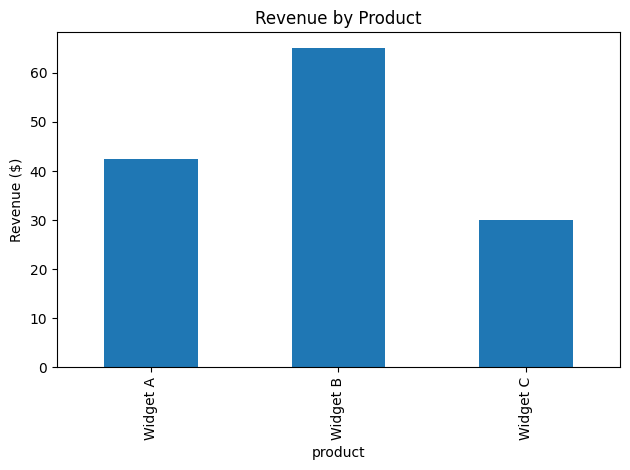

In [12]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: save the chart as an image
plt.show()


In [13]:
print("Sales Summary:")
print(df)


Sales Summary:
    product  total_qty  revenue
0  Widget A         17     42.5
1  Widget B         13     65.0
2  Widget C          3     30.0


In [15]:
conn.close()